Use linear regression for forcasting

In [104]:
from keras.layers import Dense, Input, LSTM, SimpleRNN
from keras.models import Model
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [105]:
series = np.sin(np.arange(0, 40, 0.1)**2)

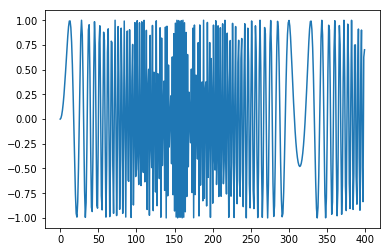

In [106]:
plt.plot(series)
plt.show()

In [107]:
# build dataset

# Predict next value using T past value
T = 10

X = []
Y = []
for t in range(len(series) - T):
    X.append(series[t:t+T])
    Y.append(series[t+T])
X = np.array(X)
Y = np.array(Y)

In [108]:
print("X:", X.shape, "Y:", Y.shape)

X: (390, 10) Y: (390,)


In [109]:
N = len(X)

In [110]:
# build auto regressive linear model

input1 = Input((T,))
x = Dense(1)(input1)

model = Model(input1, x)
model.compile(Adam(0.01), loss="mse", metrics=['accuracy'])

In [111]:
model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 0s 293us/step - loss: 1.5258 - acc: 0.0000e+00 - val_loss: 1.4569 - val_acc: 0.0000e+00
Epoch 2/80
195/195 [==============================] - 0s 220us/step - loss: 1.2889 - acc: 0.0000e+00 - val_loss: 1.3357 - val_acc: 0.0000e+00
Epoch 3/80
195/195 [==============================] - 0s 229us/step - loss: 1.1103 - acc: 0.0000e+00 - val_loss: 1.2445 - val_acc: 0.0000e+00
Epoch 4/80
195/195 [==============================] - 0s 219us/step - loss: 0.9625 - acc: 0.0000e+00 - val_loss: 1.1540 - val_acc: 0.0000e+00
Epoch 5/80
195/195 [==============================] - 0s 219us/step - loss: 0.8507 - acc: 0.0000e+00 - val_loss: 1.0596 - val_acc: 0.0000e+00
Epoch 6/80
195/195 [==============================] - 0s 219us/step - loss: 0.7614 - acc: 0.0000e+00 - val_loss: 0.9863 - val_acc: 0.0000e+00
Epoch 7/80
195/195 [==============================] - 0s 233us/step - loss: 0.6892 - acc: 0.0000e+00 -

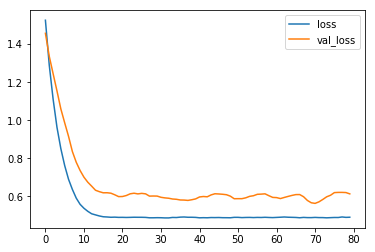

In [112]:
def generate_loss():
    r = model.history
    plt.plot(r.history['loss'], label='loss')
    plt.plot(r.history['val_loss'], label='val_loss')
    plt.legend()
    
generate_loss()

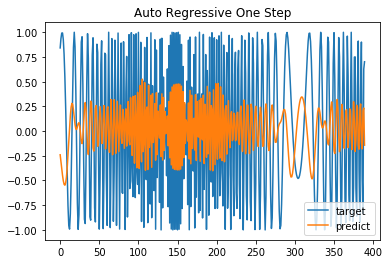

In [120]:
# one step forecast using true targets

predict = model.predict(X)
plt.title("Auto Regressive One Step")
plt.plot(Y, label="target")
plt.plot(predict, label='predict')
plt.legend()
plt.show()

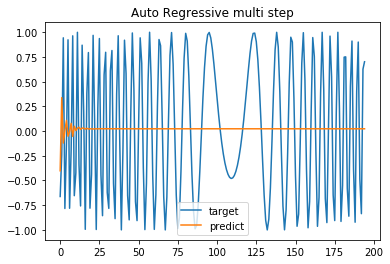

In [122]:
# multi step forecast
def multistep_plot(title=''):
    x = X
    validation_target = Y[-N//2:]
    validation_predict = []
    last_x = x[-N//2]

    while len(validation_predict) <  len(validation_target):
        try:
            predict = model.predict(last_x.reshape(1, -1))[0, 0]
        except:
            predict = model.predict(last_x.reshape(1, T, 1))[0, 0]
        validation_predict.append(predict)
        last_x = np.roll(last_x, -1)
        last_x[-1] = predict

    plt.title(title)
    plt.plot(validation_target, label='target')
    plt.plot(validation_predict, label='predict')
    plt.legend()
    
multistep_plot("Auto Regressive multi step")

the result isn't longer as good because of all the noises

In [123]:
# now try use SimpleRNN Model

input1 = Input((T, 1))
x = SimpleRNN(10)(input1)
x = Dense(1)(x)

model = Model(input1, x)
model.compile(Adam(lr=0.05), loss='mse')

In [124]:
X = X.reshape(-1, T, 1)
model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 0s 599us/step - loss: 0.6750 - val_loss: 0.6126
Epoch 2/80
195/195 [==============================] - 0s 409us/step - loss: 0.5228 - val_loss: 0.4873
Epoch 3/80
195/195 [==============================] - 0s 417us/step - loss: 0.4764 - val_loss: 0.6757
Epoch 4/80
195/195 [==============================] - 0s 419us/step - loss: 0.4487 - val_loss: 0.6685
Epoch 5/80
195/195 [==============================] - 0s 429us/step - loss: 0.4029 - val_loss: 0.4374
Epoch 6/80
195/195 [==============================] - 0s 425us/step - loss: 0.3292 - val_loss: 0.4184
Epoch 7/80
195/195 [==============================] - 0s 414us/step - loss: 0.2917 - val_loss: 0.3500
Epoch 8/80
195/195 [==============================] - 0s 436us/step - loss: 0.2120 - val_loss: 0.2928
Epoch 9/80
195/195 [==============================] - 0s 441us/step - loss: 0.1741 - val_loss: 0.1564
Epoch 10/80
195/195 [===============

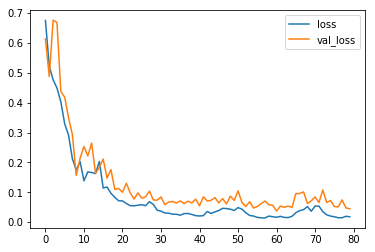

In [125]:
generate_loss()

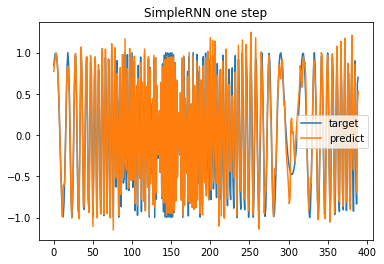

In [127]:
# one step forecast using true targets

predict = model.predict(X)
plt.title("SimpleRNN one step")
plt.plot(Y, label='target')
plt.plot(predict, label="predict")
plt.legend()
plt.show()

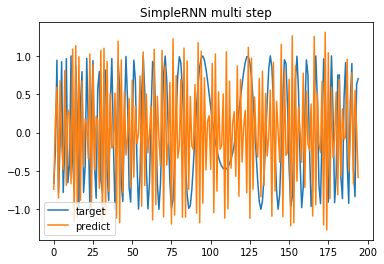

In [128]:
# multi step forecast

multistep_plot("SimpleRNN multi step")

In [129]:
# Use LSTM instead of SimpleRNN

input1 = Input((T, 1))
x = LSTM(10)(input1)
x = Dense(1)(x)

model = Model(input1, x)
model.compile(Adam(lr=0.05), loss='mse')

In [130]:
X = X.reshape(-1, T, 1)
model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 0s 1ms/step - loss: 0.5163 - val_loss: 0.6828
Epoch 2/80
195/195 [==============================] - 0s 442us/step - loss: 0.5217 - val_loss: 0.5621
Epoch 3/80
195/195 [==============================] - 0s 452us/step - loss: 0.4630 - val_loss: 0.5604
Epoch 4/80
195/195 [==============================] - 0s 514us/step - loss: 0.4207 - val_loss: 0.4410
Epoch 5/80
195/195 [==============================] - 0s 520us/step - loss: 0.3386 - val_loss: 0.4497
Epoch 6/80
195/195 [==============================] - 0s 492us/step - loss: 0.2517 - val_loss: 0.4578
Epoch 7/80
195/195 [==============================] - 0s 504us/step - loss: 0.1991 - val_loss: 0.2412
Epoch 8/80
195/195 [==============================] - 0s 502us/step - loss: 0.1286 - val_loss: 0.2150
Epoch 9/80
195/195 [==============================] - 0s 532us/step - loss: 0.0769 - val_loss: 0.1298
Epoch 10/80
195/195 [=================

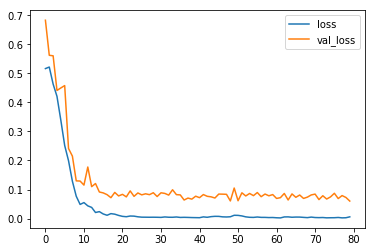

In [131]:
generate_loss()

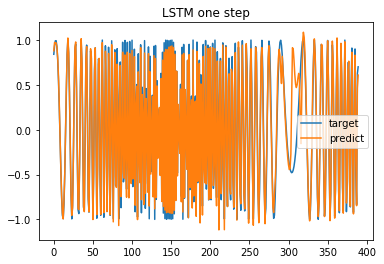

In [132]:
# one step forecast using true targets

predict = model.predict(X)
plt.title("LSTM one step")
plt.plot(Y, label='target')
plt.plot(predict, label="predict")
plt.legend()
plt.show()

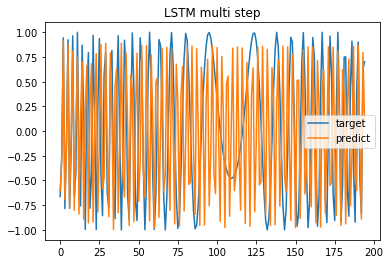

In [133]:
# multi-step froecasting 

multistep_plot("LSTM multi step")